<a href="https://colab.research.google.com/github/vengalaraoammu/143/blob/main/Potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS=3
EPOCHS=50

In [ ]:
path="/content/drive/MyDrive/Plant-Disease/training/PlantVillage"
data_set=tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=data_set.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(data_set)

68

In [ ]:
for image_batch, label_batch in data_set.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


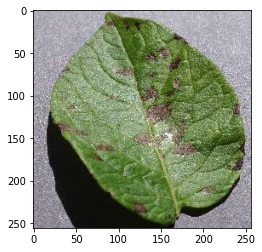

In [ ]:
plt.imshow(image_batch[2].numpy().astype("uint8"))

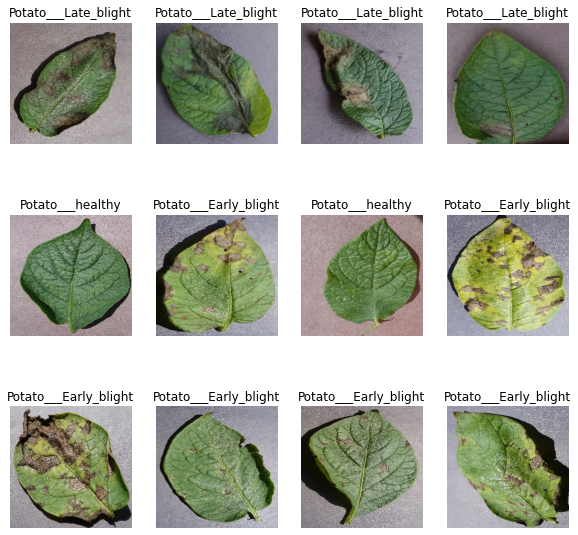

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_set.take(1):
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
80% ==> training
20% ==> 10% Validatiion, 10% test

In [ ]:
train_size=0.8
len(data_set)*train_size

54.400000000000006

In [ ]:
train_ds=data_set.take(54)
len(train_ds)

54

In [ ]:
test_ds=data_set.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(data_set)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_data_set_partition_tf(ds,train_split=0.8 , val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_da=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_data_set_partition_tf(data_set)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_agumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
History=model.fit(
    train_ds,epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 13s 151ms/step - loss: 0.9238 - accuracy: 0.4659 - val_loss: 0.8451 - val_accuracy: 0.6146
Epoch 2/50
54/54 [==============================] - 4s 74ms/step - loss: 0.8292 - accuracy: 0.5446 - val_loss: 0.6134 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 4s 74ms/step - loss: 0.6416 - accuracy: 0.7205 - val_loss: 0.7473 - val_accuracy: 0.6927
Epoch 4/50
54/54 [==============================] - 4s 73ms/step - loss: 0.4947 - accuracy: 0.7749 - val_loss: 0.5189 - val_accuracy: 0.7708
Epoch 5/50
54/54 [==============================] - 4s 73ms/step - loss: 0.3624 - accuracy: 0.8681 - val_loss: 0.3345 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 4s 73ms/step - loss: 0.2708 - accuracy: 0.8976 - val_loss: 0.2401 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 4s 73ms/step - loss: 0.2194 - accuracy: 0.9062 - val_loss: 0.2082 - val_accuracy: 0.9010
Epoch 8/50


In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 33ms/step - loss: 0.0086 - accuracy: 0.9957


In [ ]:
History

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

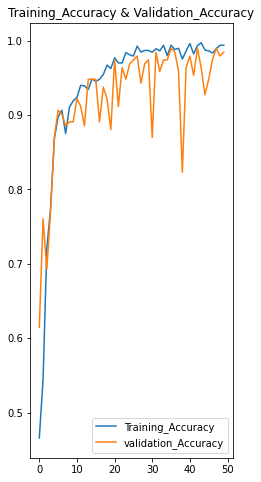

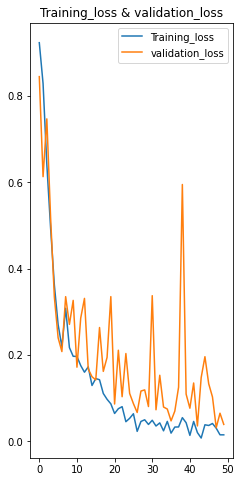

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training_Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation_Accuracy')
plt.legend(loc="lower right")
plt.title("Training_Accuracy & Validation_Accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training_loss')
plt.plot(range(EPOCHS),val_loss,label='validation_loss')
plt.legend(loc="upper right")
plt.title("Training_loss & validation_loss")
plt.show()

First_Image_TO Predict
First image's Label: Potato___Late_blight
Prdicted Label:  Potato___Late_blight


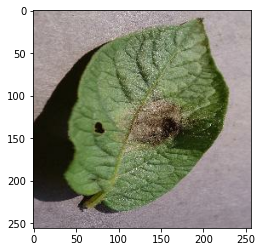

In [ ]:
import numpy as np
from matplotlib import image
for images_batch,labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0]
  print("First_Image_TO Predict")
  plt.imshow(first_image)
  print("First image's Label:",class_names[first_label])
  batch_prediction = model.predict(image_batch)
  print("Prdicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)
  return predicted_class,confidence

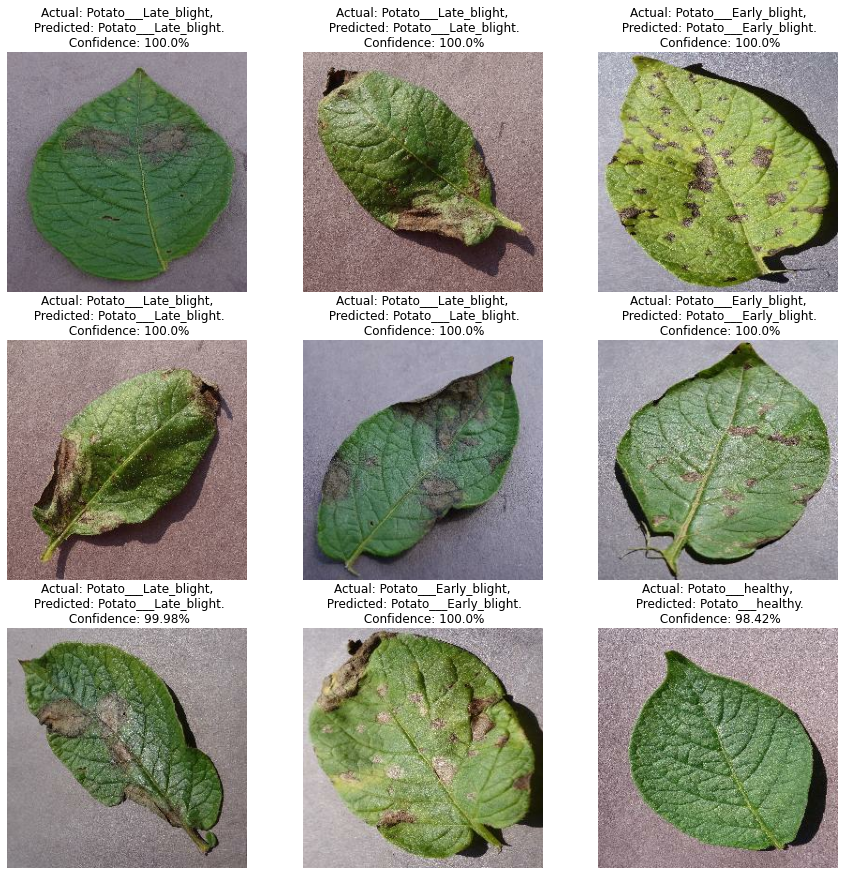

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Plant-Disease/training')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Plant-Disease/training'

In [ ]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2/assets


In [ ]:
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3/assets


In [ ]:
model.save("../potatoes.h5")